# Multiple Regression Analysis

## Data
### The Chatterjee–Price Attitude Data
From a survey of the clerical employees of a large financial organization, the data are aggregated from the questionnaires of the approximately 35 employees for each of 30 (randomly selected) departments. The numbers give the percent proportion of favourable responses to seven questions in each department

In [8]:
data(attitude) # a base dataset in R

In [10]:
# help(attitude)
# write.csv(attitude, "./Data/attitude.csv")
# attitude <- read.csv("./Data/attitude.csv")

In [ ]:
Which variables most affects the rating?

### Data Exploration

In [14]:
head(attitude)
tail(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47
6,43,55,49,44,54,49,34


,rating,complaints,privileges,learning,raises,critical,advance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,63,54,42,48,66,75,33
26,66,77,66,63,88,76,72
27,78,75,58,74,80,78,49
28,48,57,44,45,51,83,38
29,85,85,71,71,77,74,55
30,82,82,39,59,64,78,39


In [15]:
summary(attitude)

     rating        complaints     privileges       learning         raises     
 Min.   :40.00   Min.   :37.0   Min.   :30.00   Min.   :34.00   Min.   :43.00  
 1st Qu.:58.75   1st Qu.:58.5   1st Qu.:45.00   1st Qu.:47.00   1st Qu.:58.25  
 Median :65.50   Median :65.0   Median :51.50   Median :56.50   Median :63.50  
 Mean   :64.63   Mean   :66.6   Mean   :53.13   Mean   :56.37   Mean   :64.63  
 3rd Qu.:71.75   3rd Qu.:77.0   3rd Qu.:62.50   3rd Qu.:66.75   3rd Qu.:71.00  
 Max.   :85.00   Max.   :90.0   Max.   :83.00   Max.   :75.00   Max.   :88.00  
    critical        advance     
 Min.   :49.00   Min.   :25.00  
 1st Qu.:69.25   1st Qu.:35.00  
 Median :77.50   Median :41.00  
 Mean   :74.77   Mean   :42.93  
 3rd Qu.:80.00   3rd Qu.:47.75  
 Max.   :92.00   Max.   :72.00  

: The mean and median are close together.

In [16]:
str(attitude)

'data.frame':	30 obs. of  7 variables:
 $ rating    : num  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: num  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: num  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : num  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : num  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : num  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : num  45 47 48 35 47 34 35 41 31 41 ...


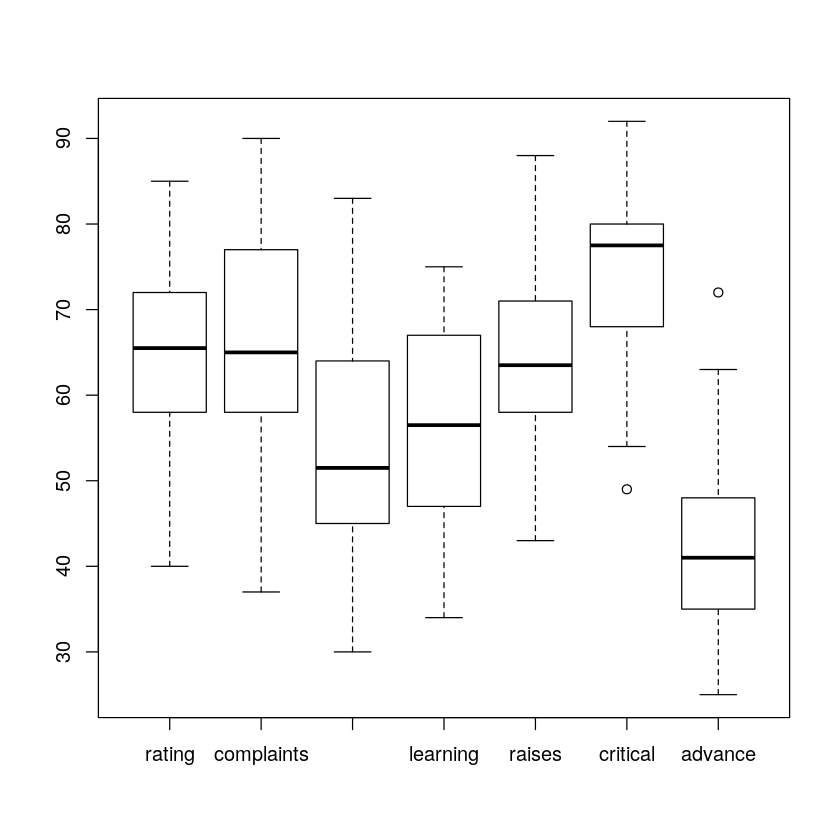

In [18]:
boxplot(attitude)

In [20]:
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


## Multiple Regression

### with all variables

In [22]:
multiReg <- lm(rating ~ ., data = attitude)
multiReg


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


In [23]:
summary(multiReg)


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


Null hypothesis is rejected because p-value is 1.24e-05 < 0.05, 

```
rating = 10.78708 + 0.61319 * complaints -0.07305 * privileges + 0.3203 * learning 
         + 0.08173 * raises + 0.03838 * critical -0.21706 * advance 
```
Adjusted R-squared:  0.6628  

Since not all variables are significantly related to the rating, we can elininate the most unrelated ones and leave the most relevant ones.

### Choose a model by AIC(Akaike Criterion) in a Stepwise Algorithm

In [27]:
multiRegStep <- step(multiReg, direction = "backward")

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

In [29]:
multiRegStep


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


In [28]:
summary(multiRegStep)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


#### Using only two variables 'complaints' and 'learning', the prediction of regression model increases from 66.2% to 68.6%.

rating = 9.8709 + 0.6435*complaints + 0.2112*learning